In [540]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [621]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, Dataset

import torch
torch.manual_seed(0)
class simple_model(nn.Module):
    def __init__(self, I, K = 10, bias = True):
        super().__init__()
        self.K = K
        # self.register_parameter(name='v', param=nn.parameter.Parameter(torch.randn((K, I))))
        self.v = nn.parameter.Parameter(torch.randn((K, I)))
        # self.v.requires_grad = True
        self.fc = nn.Linear(I, K, bias=bias)
        # self.fc2 = nn.Linear(32, K)
        # self.dropout = nn.Dropout(0.2)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = self.fc(x)
        # x = F.relu(x)
        # x = self.fc2(x)
        x = F.softmax(x)

            # hidden, _ = self.rnn_layers[t](x_, hidden)   
        
        # print(v_)
        v_ = self.relu(self.v)
        self.v = nn.parameter.Parameter(v_)
        
        print(self.v)
        return x, v_, torch.matmul(x, (v_))



In [311]:
data = pd.read_csv("input_matrix_2020_all.csv", index_col = 0)

In [313]:
from sklearn.preprocessing import MinMaxScaler
minmax_sc = MinMaxScaler()
df_ouput_alltime_scaled = minmax_sc.fit_transform(data)

In [611]:
train = TensorDataset(torch.Tensor(df_ouput_alltime_scaled),torch.Tensor(df_ouput_alltime_scaled))
# test = TensorDataset(featuresTest,targetsTest)
batch_size = 32
# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(train, batch_size = 1000, shuffle = False)
    

# K =50

In [622]:

n_iters = 1000

n_items = df_ouput_alltime_scaled.shape[1]

for k in [10]:

    loss_ls = []
    factorize_model = simple_model(n_items, K = k, bias=False)
    def loss_func(y_pred, y_true, v):
        return torch.sum(torch.square(y_pred - y_true)) + 1 * torch.sum(torch.abs(v))
    # def loss_func(y_pred, y_true, v):return torch.sum(torch.square(y_pred - y_true)) 


    learning_rate = 0.01
    optimizer = torch.optim.Adam(factorize_model.parameters(), lr=learning_rate)

    for iter in range(n_iters):
        # Forward pass: Compute predicted y by passing x to the model
        batch_loss = 0.001
        for idx, (x, y) in enumerate(train_loader):

            u, v, y_pred = factorize_model(x)
            # print(factorize_model.v)
            # Compute and print loss
            loss = loss_func(y_pred, y, v) 
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # factorize_model.v.data.clamp_(0)
            batch_loss += loss.detach().cpu().numpy()
        loss_ls.append(batch_loss)
        print(iter, batch_loss)
    
    plt.figure()
    plt.title(f'loss_{k}')
    plt.plot(loss_ls)
    plt.xlabel("batch")
    plt.ylabel("Loss")

    u_pred, v_pred, y_pred = factorize_model(train.tensors[0])
    print(torch.sum(torch.square(train.tensors[0] - torch.matmul(u_pred.data, v_pred.data))))
    


C:\Users\kusod\AppData\Local\Temp/ipykernel_15548/15286503.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


Parameter containing:
tensor([[-1.1258, -1.1524, -0.2506,  ...,  0.4847,  1.4251, -2.2151],
        [-0.2594, -0.6433, -1.6288,  ...,  0.5770,  0.1458,  0.4221],
        [ 0.3836, -0.6118,  0.8358,  ...,  0.0358, -0.2649,  0.4996],
        ...,
        [-0.3230, -1.0845,  0.0869,  ..., -1.1473,  1.5074,  0.3112],
        [-0.6867, -0.3061,  0.6661,  ..., -1.2651, -1.6125, -0.8348],
        [ 0.5013, -0.1074, -0.4877,  ...,  0.2428, -1.0653, -0.5892]],
       requires_grad=True)
Parameter containing:
tensor([[-1.1258, -1.1524, -0.2506,  ...,  0.4747,  1.4151, -2.2151],
        [-0.2594, -0.6433, -1.6288,  ...,  0.5670,  0.1358,  0.4121],
        [ 0.3736, -0.6118,  0.8258,  ...,  0.0258, -0.2649,  0.4896],
        ...,
        [-0.3230, -1.0845,  0.0769,  ..., -1.1473,  1.4974,  0.3012],
        [-0.6867, -0.3061,  0.6561,  ..., -1.2651, -1.6125, -0.8348],
        [ 0.4913, -0.1074, -0.4877,  ...,  0.2328, -1.0653, -0.5892]],
       requires_grad=True)
Parameter containing:
tensor([[-1.

KeyboardInterrupt: 

In [612]:

# T = train_data.shape[0]
# factorize_model = simple_model(n_items, K = 20, bias=False)
factorize_model_20 = simple_model(n_items, K = 10, bias=False)
def loss_func(y_pred, y_true, v):return torch.sum(torch.square(y_pred - y_true)) + 1 * torch.sum(torch.abs(v))
# def loss_func(y_pred, y_true, v):return torch.sum(torch.square(y_pred - y_true)) 
# SGD Optimizer
learning_rate = 0.001
optimizer = torch.optim.Adam(factorize_model_20.parameters(), lr=learning_rate)

for iter in range(n_iters):
    # Forward pass: Compute predicted y by passing x to the model
    batch_loss = 0
    for idx, (x, y) in enumerate(train_loader):

        u, v, y_pred = factorize_model_20(x)
        # print(factorize_model.v)
        # Compute and print loss
        loss = loss_func(y_pred, y, v) 
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # factorize_model_20.v.data.clamp_(0)
        # cur_loss = loss.detach().cpu().numpy()
        batch_loss += loss.detach().cpu().numpy()
        # loss_ls.append(batch_loss)
        # print(iter, batch_loss)
    print(iter, batch_loss)
    
plt.figure()
plt.title(f'loss_{k}')
plt.plot(loss_ls)
plt.xlabel("batch")
plt.ylabel("Loss")



C:\Users\kusod\AppData\Local\Temp/ipykernel_15548/2914962579.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


0 16186.5
0 32337.701171875
0 48554.2568359375
0 64750.4345703125
0 81002.876953125
0 97179.0087890625
0 113439.76171875
0 129685.296875
0 145914.009765625
0 162032.3466796875
0 178203.6318359375
0 194486.302734375
0 210739.8330078125
0 226946.9296875
0 243187.6982421875
0 259368.435546875
0 275603.2705078125
0 291834.7275390625
0 308050.025390625
0 324238.515625
0 340451.2490234375
0 356626.046875
0 372815.5537109375
0 389033.513671875
0 405169.44921875
0 421391.19921875
0 437498.765625
0 453685.5029296875
0 469875.078125
0 486054.8681640625
0 502241.794921875
0 511108.736328125
1 16187.33203125
1 32365.5966796875
1 48607.8291015625
1 64777.9814453125
1 80911.6142578125
1 97186.6015625
1 113378.4970703125
1 129545.5126953125
1 145749.44921875
1 161888.9814453125
1 178040.9248046875
1 194229.55078125
1 210477.115234375
1 226699.8955078125
1 242850.3046875
1 258997.7822265625
1 275189.376953125
1 291396.1767578125
1 307683.595703125
1 323907.0673828125
1 340078.421875
1 356295.916992187

KeyboardInterrupt: 

In [591]:
u_pred, v_pred, y_pred = factorize_model_20(train.tensors[0])

C:\Users\kusod\AppData\Local\Temp/ipykernel_15548/594151166.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


In [596]:
u_pred.shape

torch.Size([1000, 50])

In [592]:
torch.sum(torch.square(train.tensors[0] - torch.matmul(u_pred.data, v_pred.data))) 

tensor(6318.8428)

In [593]:
df_H_sc = pd.DataFrame(v_pred.data.numpy(), columns=data.columns)
df_H_sc

,乳製風味飲品_amount,乳製風味飲品_freq,綠茶_amount,綠茶_freq,停車費_amount,停車費_freq,碳酸飲料_amount,碳酸飲料_freq,牙刷_amount,牙刷_freq,...,其他文具圖書_amount,其他文具圖書_freq,點鈔機_amount,點鈔機_freq,投影機_amount,投影機_freq,美甲玩具_amount,美甲玩具_freq,美髮剪_amount,美髮剪_freq
0,0.00000,0.000000,0.000000,1.478348,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.01282,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.552047,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.00000,0.162090,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.724317,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [586]:
# df_H_sc.loc[:, df_H_sc.columns.str.contains(("|").join(["香菸", "啤酒"]))]
# df_H_sc.loc[:, df_H_sc.columns.str.contains(("|").join(["菸", "酒", "公益", "人蔘/靈芝/樟芝/冬蟲夏草", "薑黃"]))]
df_H_sc.loc[:, df_H_sc.columns.str.contains(("|").join(["菸", "酒"]))].sum(axis = 1).sort_values(ascending = False)

6     0.066196
0     0.000000
38    0.000000
28    0.000000
29    0.000000
30    0.000000
31    0.000000
32    0.000000
33    0.000000
34    0.000000
35    0.000000
36    0.000000
37    0.000000
39    0.000000
26    0.000000
40    0.000000
41    0.000000
42    0.000000
43    0.000000
44    0.000000
45    0.000000
46    0.000000
47    0.000000
48    0.000000
27    0.000000
25    0.000000
1     0.000000
24    0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
49    0.000000
dtype: float32

In [599]:
# np.sum(df_H_sc.loc[, :].nlargest(10)) / np.sum(df_H_sc.loc[i, :])
# df_H_sc.apply(lambda x : np.sum(x.nlargest(5)) / np.sum(x), axis = 1)
np.sum(df_H_sc.apply(lambda x : np.sum(x.nlargest(5)) / np.sum(x), axis = 1) > 0)

C:\Users\kusod\AppData\Local\Temp/ipykernel_15548/2031810671.py:3: RuntimeWarning: invalid value encountered in float_scalars
  np.sum(df_H_sc.apply(lambda x : np.sum(x.nlargest(5)) / np.sum(x), axis = 1) > 0)


25

In [604]:
pd.DataFrame(u_pred.data.numpy())

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.024877,7.306844e-03,0.039538,0.009165,0.028081,0.011873,7.686435e-03,1.046081e-02,0.016841,0.013903,...,0.013573,8.796354e-03,0.015593,0.027019,8.853155e-03,0.009879,0.009596,0.015693,1.481273e-02,0.023676
1,0.008438,3.172681e-04,0.020144,0.002098,0.031477,0.002048,1.053676e-04,1.693312e-04,0.010559,0.003793,...,0.001465,1.561230e-04,0.004692,0.061701,1.375989e-04,0.001438,0.000615,0.007560,2.149005e-03,0.017189
2,0.042697,1.214465e-07,0.001961,0.000002,0.100864,0.000009,1.068092e-08,1.402048e-07,0.000239,0.000685,...,0.325113,2.313603e-08,0.001313,0.001841,3.798155e-08,0.266713,0.000001,0.000028,1.106308e-07,0.061043
3,0.050041,2.806262e-05,0.138564,0.000646,0.144136,0.015844,9.446150e-06,6.335060e-05,0.002395,0.023787,...,0.000894,1.716778e-05,0.052122,0.048007,2.197178e-05,0.000931,0.000041,0.011575,7.571055e-04,0.067530
4,0.018821,1.946286e-04,0.048161,0.000321,0.009000,0.000675,1.029749e-04,1.948239e-04,0.002754,0.001439,...,0.004691,1.601701e-04,0.015982,0.052613,1.549581e-04,0.002879,0.000747,0.006417,1.749619e-04,0.045925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.008838,3.012537e-04,0.033422,0.012783,0.019298,0.001698,1.087957e-04,2.782109e-04,0.003669,0.020036,...,0.002742,1.728974e-04,0.025602,0.012423,1.886864e-04,0.001679,0.003898,0.004036,4.088761e-03,0.019167
996,0.011146,2.354716e-03,0.023884,0.007512,0.013354,0.004739,1.448370e-03,1.627145e-03,0.005487,0.009852,...,0.005699,1.832903e-03,0.010062,0.011713,1.737094e-03,0.004243,0.006403,0.008025,3.495297e-03,0.010855
997,0.043030,6.840327e-06,0.004388,0.000411,0.073034,0.000436,1.006168e-06,8.210945e-06,0.000698,0.022726,...,0.000392,1.621432e-06,0.035139,0.047543,2.519338e-06,0.000203,0.000015,0.001607,3.274853e-04,0.066352
998,0.014126,1.504579e-03,0.024705,0.003177,0.009715,0.003880,8.509176e-04,1.149587e-03,0.007330,0.011182,...,0.006336,1.077866e-03,0.007961,0.018783,1.015076e-03,0.003586,0.004635,0.015168,5.240295e-03,0.010974


In [601]:
pd.DataFrame(df_H_sc.loc[3, :].sort_values(ascending = False)[:30])

,3
行車記錄器/導航_freq,2.840502
掛鉤_freq,0.214923
電玩遊戲軟體_freq,0.205632
烘乾機_freq,0.128923
馬桶設備_freq,0.095142
體重/體脂計_freq,0.073598
分裝瓶/罐_freq,0.067822
手機/平板/相機記憶卡_amount,0.048517
沙拉_amount,0.046826
保鮮盒/罐_amount,0.044172


In [600]:
df_H_sc.apply(lambda x : np.sum(x.nlargest(5)) / np.sum(x), axis = 1)

C:\Users\kusod\AppData\Local\Temp/ipykernel_15548/2008653583.py:1: RuntimeWarning: invalid value encountered in float_scalars
  df_H_sc.apply(lambda x : np.sum(x.nlargest(5)) / np.sum(x), axis = 1)


0     0.365790
1          NaN
2     0.415071
3     0.925403
4     0.186940
5     0.991654
6          NaN
7          NaN
8     1.000000
9     0.280037
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15    0.164087
16         NaN
17         NaN
18         NaN
19    0.957336
20         NaN
21         NaN
22         NaN
23    0.364826
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29    1.000000
30    0.932678
31    0.508557
32    0.288260
33    0.243763
34    1.000000
35         NaN
36         NaN
37         NaN
38         NaN
39    0.395528
40    1.000000
41         NaN
42    0.246348
43    0.480735
44         NaN
45    0.947855
46    0.853725
47    0.612198
48    0.990881
49    0.300533
dtype: float32

# no scaled data

In [569]:
train = TensorDataset(torch.Tensor(data.values),torch.Tensor(data.values))
# test = TensorDataset(featuresTest,targetsTest)
batch_size = 250
# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(train, batch_size = 1000, shuffle = False)

C:\Users\kusod\AppData\Local\Temp/ipykernel_15548/594151166.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


0 504124211200.0
0 987228635136.0
0 1347368878080.0
0 1740503285760.0
1 420282007552.0
1 916813709312.0
1 1313831976960.0
1 1740486377472.0
2 629998354432.0
2 919686643712.0
2 1383866728448.0
2 1740474744832.0
3 271445786624.0
3 499262586880.0
3 1224944943104.0
3 1740471926784.0
4 375084187648.0
4 807378288640.0
4 1201939709952.0
4 1740469829632.0
5 488644509696.0
5 935795818496.0
5 1149809410048.0
5 1740466569216.0
6 771887726592.0
6 1322632216576.0
6 1491710525440.0
6 1740463259648.0
7 335514468352.0
7 766032445440.0
7 990529421312.0
7 1740459769856.0
8 410078937088.0
8 951442079744.0
8 1391140405248.0
8 1740456067072.0
9 714050174976.0
9 1087966609408.0
9 1546792337408.0
9 1740452610048.0
10 844319555584.0
10 1205265858560.0
10 1532777627648.0
10 1740449087488.0
11 584247148544.0
11 855012524032.0
11 1165728366592.0
11 1740445401088.0
12 658010079232.0
12 902686539776.0
12 1504507101184.0
12 1740442124288.0
13 434899943424.0
13 851908755456.0
13 1225039708160.0
13 1740438503424.0
14

Text(0, 0.5, 'Loss')

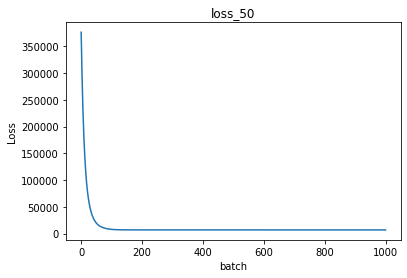

In [575]:

# T = train_data.shape[0]
# factorize_model = simple_model(n_items, K = 20, bias=False)
factorize_model_20 = simple_model(n_items, K = 50, bias=False)
def loss_func(y_pred, y_true, v):return torch.sum(torch.square(y_pred - y_true)) + 1 * torch.sum(torch.abs(v))
# def loss_func(y_pred, y_true, v):return torch.sum(torch.square(y_pred - y_true)) 
# SGD Optimizer
learning_rate = 0.01
optimizer = torch.optim.Adam(factorize_model_20.parameters(), lr=learning_rate)

for iter in range(n_iters):
    # Forward pass: Compute predicted y by passing x to the model
    batch_loss = 0
    for idx, (x, y) in enumerate(train_loader):

        u, v, y_pred = factorize_model_20(x)
        # print(factorize_model.v)
        # Compute and print loss
        loss = loss_func(y_pred, y, v) 
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # factorize_model_20.v.data.clamp_(0)
        # cur_loss = loss.detach().cpu().numpy()
        batch_loss += loss.detach().cpu().numpy()
        # loss_ls.append(batch_loss)
        # print(iter, batch_loss)
        print(iter, batch_loss)
    
plt.figure()
plt.title(f'loss_{k}')
plt.plot(loss_ls)
plt.xlabel("batch")
plt.ylabel("Loss")



In [576]:
u_pred, v_pred, y_pred = factorize_model_20(train.tensors[0])

C:\Users\kusod\AppData\Local\Temp/ipykernel_15548/594151166.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


In [577]:
df_H_sc = pd.DataFrame(v_pred.data.numpy(), columns=data.columns)
df_H_sc

,乳製風味飲品_amount,乳製風味飲品_freq,綠茶_amount,綠茶_freq,停車費_amount,停車費_freq,碳酸飲料_amount,碳酸飲料_freq,牙刷_amount,牙刷_freq,...,其他文具圖書_amount,其他文具圖書_freq,點鈔機_amount,點鈔機_freq,投影機_amount,投影機_freq,美甲玩具_amount,美甲玩具_freq,美髮剪_amount,美髮剪_freq
0,0.000000,0.000000,4.558601,0.000000,1.631492,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,0.127475,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2,0.000000,0.000000,0.347910,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
3,4.744063,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
5,0.000000,0.000000,0.613434,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
7,0.000000,0.000000,1.173595,0.000000,0.000000,0.000000,2.195264,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


In [578]:
torch.sum(torch.square(train.tensors[0] - torch.matmul(u_pred.data, v_pred.data))) 

tensor(1.7376e+12)

In [579]:
df_H_sc.apply(lambda x : np.sum(x.nlargest(5)) / np.sum(x), axis = 1)

0     0.260489
1     0.225969
2     1.000000
3     0.554374
4     0.777268
5     0.959011
6     0.958761
7     0.176064
8     0.359772
9     1.000000
10    0.291523
11    0.974125
12    0.145360
13    0.436266
14    0.892637
15    0.294497
16    0.577136
17    1.000000
18    0.525745
19    0.296207
20    0.025553
21    0.802306
22    0.600546
23    0.320046
24    0.174278
25    1.000000
26    0.161695
27    1.000000
28    0.320285
29    0.260173
30    0.766172
31    0.991030
32    0.379929
33    0.062108
34    0.348624
35    0.704106
36    0.178424
37    0.986401
38    0.444392
39    0.251929
40    0.731092
41    0.112536
42    0.302038
43    0.148071
44    0.307948
45    1.000000
46    0.085066
47    0.440796
48    0.109784
49    0.451429
dtype: float32

# K = 20

In [360]:

# T = train_data.shape[0]
# factorize_model = simple_model(n_items, K = 20, bias=False)
factorize_model_20 = simple_model(n_items, K = 20, bias=False)
def loss_func(y_pred, y_true, v):return torch.sum(torch.square(y_pred - y_true)) + 0.5 * torch.sum(torch.abs(v))
# def loss_func(y_pred, y_true, v):return torch.sum(torch.square(y_pred - y_true)) 
# SGD Optimizer
learning_rate = 0.05
optimizer = torch.optim.Adam(factorize_model_20.parameters(), lr=learning_rate)

for iter in range(n_iters):
    # Forward pass: Compute predicted y by passing x to the model
    for idx, (x, y) in enumerate(train_loader):

        u, y_pred = factorize_model_20(x)
        # print(factorize_model.v)
        # Compute and print loss
        loss = loss_func(y_pred, y, factorize_model_20.v) 
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        factorize_model_20.v.data.clamp_(0)
        cur_loss = loss.detach().cpu().numpy()
    print(iter, cur_loss)

C:\Users\kusod\AppData\Local\Temp/ipykernel_15548/3558627637.py:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


0 728.35913
1 77.57301
2 39.852978
3 35.174183
4 34.716537
5 34.504166
6 34.42052
7 34.310165
8 34.2137
9 34.24523
10 34.197563
11 34.082634
12 34.055275
13 34.039833
14 33.94207
15 33.902233
16 33.77555
17 34.059517
18 33.901413
19 33.981846
20 33.805683
21 34.166748
22 34.010178
23 33.854336
24 33.745113
25 34.250874
26 34.094204
27 34.127457
28 33.649456
29 34.031757
30 34.267673
31 34.265102
32 33.841328
33 34.22685
34 34.19512
35 34.0204
36 34.054382
37 34.02429
38 34.26535
39 34.282135
40 34.184166
41 34.14465
42 33.65316
43 34.50746
44 34.39794
45 34.492348
46 33.957855
47 33.868397
48 34.029427
49 34.355812
50 34.445713
51 34.47402
52 34.22853
53 34.40379
54 33.390484
55 33.897797
56 35.611588
57 35.273666
58 34.83027
59 34.000237
60 33.599697
61 33.89594
62 34.154243
63 34.09919
64 34.1099
65 33.843437
66 33.94904
67 33.855362
68 33.946274
69 34.218933
70 34.24418
71 34.511726
72 34.281216
73 33.81244
74 33.5345
75 33.593666
76 33.58567
77 34.271706
78 34.88193
79 34.388847
80

In [361]:

df_H_sc = pd.DataFrame(factorize_model_20.v.data.numpy(), columns=data.columns)
df_H_sc

,乳製風味飲品_amount,乳製風味飲品_freq,綠茶_amount,綠茶_freq,停車費_amount,停車費_freq,碳酸飲料_amount,碳酸飲料_freq,牙刷_amount,牙刷_freq,...,其他文具圖書_amount,其他文具圖書_freq,點鈔機_amount,點鈔機_freq,投影機_amount,投影機_freq,美甲玩具_amount,美甲玩具_freq,美髮剪_amount,美髮剪_freq
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.002538,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.028446,0.000000,0.000000,0.00000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
